# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [20]:
# If on colab, uncomment the following lines

!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [23]:
data = dataset.data.features
target = dataset.data.targets

nan_indices = np.isnan(data).any(axis=1)

# # # Filter the data and target arrays
data = data[~nan_indices] # Select rows where NaN is not present
target = target[~nan_indices]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(845, 18) (845, 1)
(549, 18) (549, 1) (296, 18) (296, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [24]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
401,85.0,37,80,158,59,8,153,44,19,126,179,348,136,69,6,21,191,197
250,95.0,38,66,126,52,8,133,52,18,140,158,253,140,78,11,8,184,183
337,99.0,51,88,188,62,5,203,32,23,158,222,625,219,77,8,26,191,190
328,93.0,43,88,170,66,9,150,45,19,147,164,334,143,65,2,17,196,206
216,84.0,44,77,150,59,5,152,44,19,143,175,344,177,77,8,2,183,187
555,87.0,49,86,190,64,9,177,37,21,153,197,471,209,67,11,7,192,199
562,113.0,53,93,197,62,11,216,31,24,165,221,688,196,72,6,25,188,199
172,94.0,45,81,166,67,9,145,46,19,147,164,313,179,66,11,14,194,202
285,89.0,48,85,189,64,8,169,39,20,153,188,427,190,64,16,5,195,201
397,89.0,41,75,162,66,5,153,43,19,136,175,352,154,72,2,0,188,195


Methods `describe` and `info` deliver some useful information.

In [25]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.479053,44.734062,82.078324,168.939891,61.839709,8.652095,168.251366,41.034608,20.530055,147.599271,188.262295,436.801457,173.591985,72.346084,6.335155,12.351548,189.096539,195.825137
std,8.349681,6.029607,15.602126,33.422287,8.465031,4.994258,32.983609,7.748127,2.590252,14.208037,31.463576,175.370033,31.771958,7.954047,4.936519,9.022190,6.252574,7.496132
min,73.000000,33.000000,40.000000,104.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,142.000000,57.000000,7.000000,146.000000,34.000000,19.000000,137.000000,168.000000,318.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,92.000000,44.000000,80.000000,167.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.000000,362.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,99.000000,49.000000,96.000000,195.000000,65.000000,10.000000,196.000000,46.000000,23.000000,158.000000,215.000000,576.000000,195.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,116.000000,58.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,180.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [26]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 401 to 394
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       549 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADI

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [27]:
### YOUR CODE HERE
from sklearn import preprocessing

normalize = preprocessing.RobustScaler()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be remove

Accuracy: 0.8006756756756757
f1: 0.8027240845699264


/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

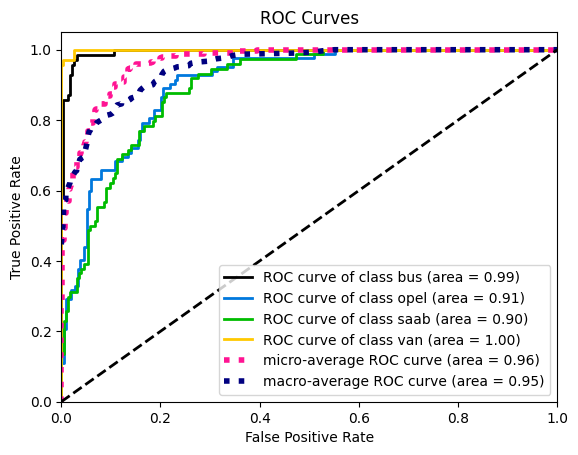

In [28]:
### YOUR CODE HERE

import sklearn
from sklearn.linear_model import LogisticRegression
from scikitplot import metrics
model = LogisticRegression(max_iter=500, tol=1e-3, solver="saga", multi_class="multinomial")
params = {'penalty':['l1', 'l2'], 'C':[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 2.0, 2.5, 5.0]}
gs_lr = sklearn.model_selection.GridSearchCV(model, params, return_train_score=True)
gs_lr.fit(X_train, y_train)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, gs_lr.predict(X_test)))
print("f1:", sklearn.metrics.f1_score(y_test, gs_lr.predict(X_test), average='macro'))
metrics.plot_roc(y_test, gs_lr.predict_proba(X_test))

In [29]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

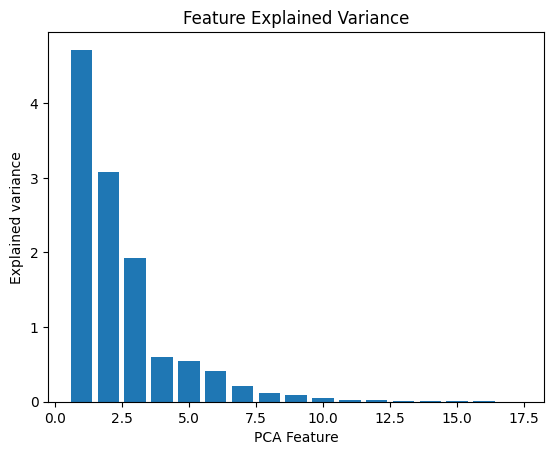

In [30]:
### YOUR CODE HERE

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(17)
pca.fit(X_train)
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

After 8th component varience is small enought to drop it. Notmalization has been already done before, and there is no need to normalize data after PCA.

In [31]:
### YOUR CODE HERE
pca = PCA(8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be remove

Accuracy: 0.6722972972972973
f1: 0.664739009747224


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

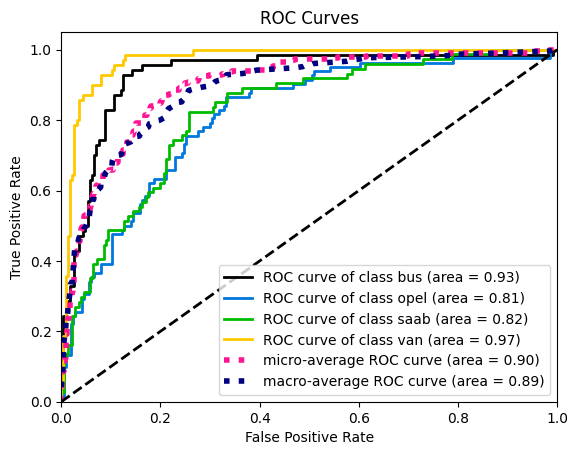

In [32]:
### YOUR CODE HERE
param_grid = {'penalty':['l1', 'l2'], 'C':np.linspace(0.2, 2.0, 10)}
model = LogisticRegression(max_iter=500, tol=1e-3, solver="saga", multi_class="multinomial")
gs_lr_pca = sklearn.model_selection.GridSearchCV(model, param_grid, return_train_score=True)
gs_lr_pca.fit(X_train_pca, y_train)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, gs_lr_pca.predict(X_test_pca)))
print("f1:", sklearn.metrics.f1_score(y_test, gs_lr_pca.predict(X_test_pca), average='macro'))
metrics.plot_roc(y_test, gs_lr_pca.predict_proba(X_test_pca))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [33]:
# YOUR CODE HERE
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# params = {'max_depth':np.arange(1, 50, 1)}
# gs_dt = sklearn.model_selection.GridSearchCV(dt, params, return_train_score=True)
# gs_dt.fit(X_train, y_train)
# print("Accuracy:", sklearn.metrics.accuracy_score(y_test, gs_dt.predict(X_test)))
# print("f1:", sklearn.metrics.f1_score(y_test, gs_dt.predict(X_test), average='macro'))
# metrics.plot_roc(y_test, gs_dt.predict_proba(X_test))


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [34]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

# f1_scores = []
# accuracy_scores = []
# estimators = np.arange(2, 100, 5)
# for estimator_num in estimators:
#   bg = BaggingClassifier(gs_lr.best_estimator_, estimator_num)
#   bg.fit(X_train, y_train)
#   f1_scores.append(sklearn.metrics.f1_score(y_test, bg.predict(X_test), average = "macro"))
#   accuracy_scores.append(sklearn.metrics.accuracy_score(y_test, bg.predict(X_test)))

# fig, ax = plt.subplots()
# ax.plot(estimators, f1_scores, label="f1")
# ax.plot(estimators, accuracy_scores, label="accuracy")
# ax.legend()
# plt.show()

In [35]:
# f1_scores = []
# accuracy_scores = []
# estimators = np.arange(2, 100, 5)
# for estimator_num in estimators:
#   bg = BaggingClassifier(gs_dt.best_estimator_, estimator_num)
#   bg.fit(X_train, y_train)
#   f1_scores.append(sklearn.metrics.f1_score(y_test, bg.predict(X_test), average = "macro"))
#   accuracy_scores.append(sklearn.metrics.accuracy_score(y_test, bg.predict(X_test)))

# fig, ax = plt.subplots()
# ax.plot(estimators, f1_scores, label="f1")
# ax.plot(estimators, accuracy_scores, label="accuracy")
# ax.legend()
# plt.show()

Optimal number of algorythms based on scores: 16 for logistic regression and 42 for decision tree.
Bootstraping shuffles train data used, so hyperparameters can be not optimal.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [36]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

# f1_scores = []
# accuracy_scores = []
# estimators = np.arange(2, 100, 5)
# for estimator_num in estimators:
#   rf = RandomForestClassifier(n_estimators=estimator_num)
#   rf.fit(X_train, y_train)
#   f1_scores.append(sklearn.metrics.f1_score(y_test, rf.predict(X_test), average = "macro"))
#   accuracy_scores.append(sklearn.metrics.accuracy_score(y_test, rf.predict(X_test)))

# fig, ax = plt.subplots()
# ax.plot(estimators, accuracy_scores, label="accuracy_forest")
# ax.plot(estimators, f1_scores, label="f1_forest")
# ax.legend()
# plt.show()

Optimal number of trees: 18. It seems that random forest converges faster than decision tree ensemble.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

/home/namin/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

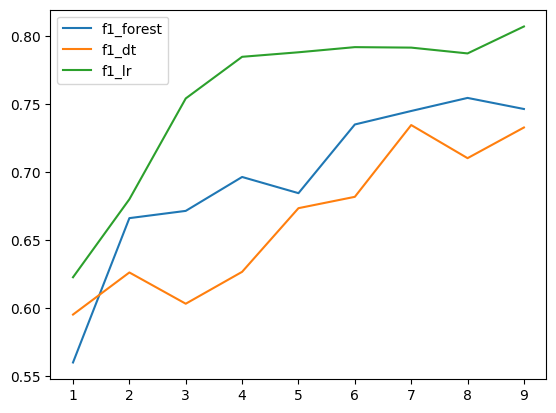

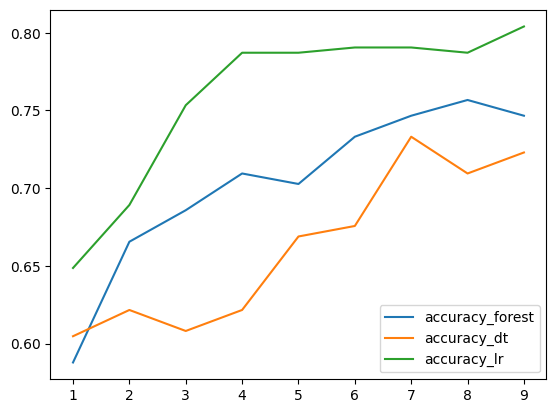

In [37]:
# YOUR CODE HERE
train_parts = np.arange(1, 10, 1)
accuracy_lr = []
accuracy_dt = []
accuracy_rf = []
f1_lr = []
f1_dt = []
f1_rf = []
rf = RandomForestClassifier(n_estimators=18)
for n_parts in train_parts:
  X_train_subset = X_train[:int(n_parts*X_train.shape[0]/10)]
  y_train_subset = y_train[:int(n_parts*y_train.shape[0]/10)]
  rf.fit(X_train_subset, y_train_subset)
  f1_rf.append(sklearn.metrics.f1_score(y_test, rf.predict(X_test), average = "macro"))
  accuracy_rf.append(sklearn.metrics.accuracy_score(y_test, rf.predict(X_test)))

  gs_dt.fit(X_train_subset, y_train_subset)
  f1_dt.append(sklearn.metrics.f1_score(y_test, gs_dt.predict(X_test), average = "macro"))
  accuracy_dt.append(sklearn.metrics.accuracy_score(y_test, gs_dt.predict(X_test)))

  gs_lr.fit(X_train_subset, y_train_subset)
  f1_lr.append(sklearn.metrics.f1_score(y_test, gs_lr.predict(X_test), average = "macro"))
  accuracy_lr.append(sklearn.metrics.accuracy_score(y_test, gs_lr.predict(X_test)))

fig, ax = plt.subplots()
ax.plot(train_parts, f1_rf, label="f1_forest")
ax.plot(train_parts, f1_dt, label="f1_dt")
ax.plot(train_parts, f1_lr, label="f1_lr")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(train_parts, accuracy_rf, label="accuracy_forest")
ax.plot(train_parts, accuracy_dt, label="accuracy_dt")
ax.plot(train_parts, accuracy_lr, label="accuracy_lr")
ax.legend()
plt.show()

Logistic regression gives the best scores. Decision tree has strange local minimum that other models don't have. Perhaps that means that decision tree is less stable.